In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path = '/content/drive/MyDrive/Portfolio Alita Ramadhina/Sample_Superstore.csv'

df = pd.read_csv(path, encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [21]:
df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [23]:
df.duplicated().sum()  # Cek jumlah baris duplikat
df = df.drop_duplicates()  # Hapus duplikat jika ada

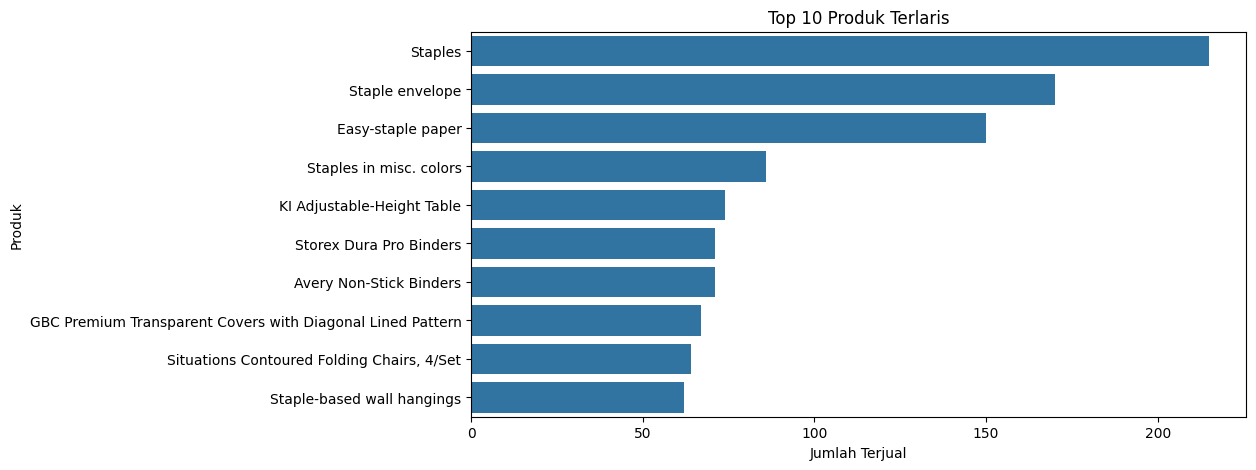

In [20]:
# Produk terlaris
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Produk')
plt.show()

/tmp/ipython-input-24-1343778254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.values, y=profit_by_category.index, palette='Greens')


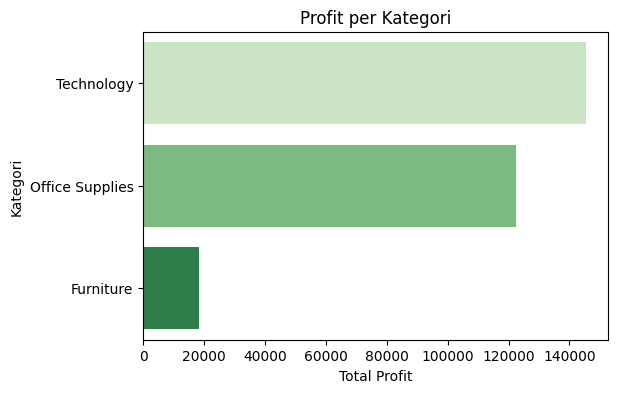

In [24]:
#kategori yang paling menguntungkan
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_category.values, y=profit_by_category.index, palette='Greens')
plt.title('Profit per Kategori')
plt.xlabel('Total Profit')
plt.ylabel('Kategori')
plt.show()

In [ ]:
#Tren Penjualan Bulanan

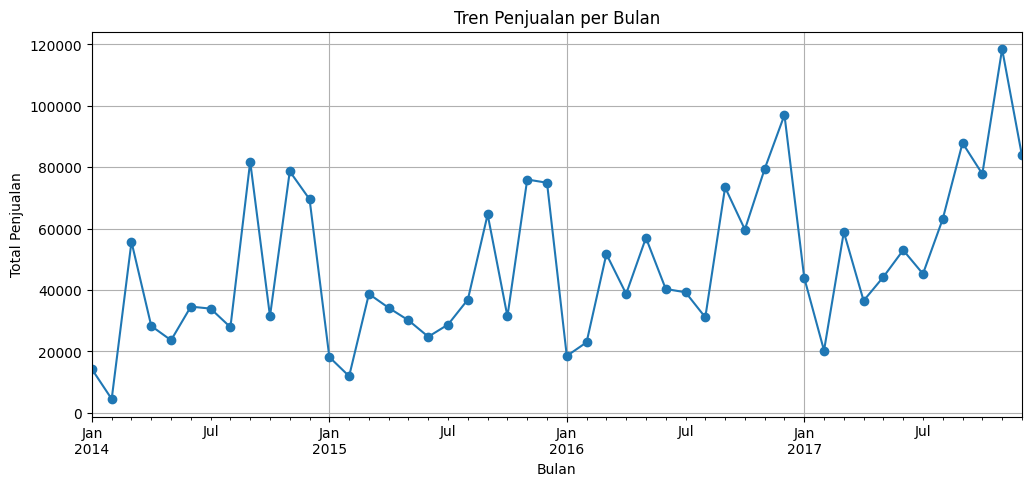

In [25]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(12,5), marker='o')
plt.title('Tren Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

/tmp/ipython-input-26-339735318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.values, y=region_profit.index, palette='Set2')


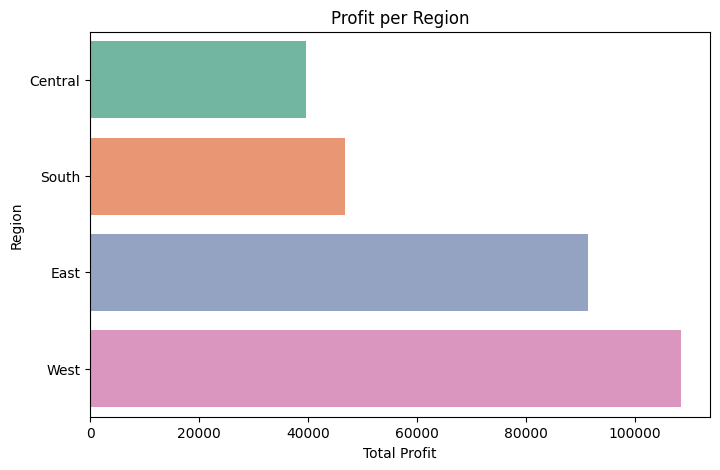

In [26]:
#wilayah Paling Menguntungkan
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.values, y=region_profit.index, palette='Set2')
plt.title('Profit per Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.show()

# Analisis Segmen Pelanggan

Mengetahui segmen mana (Consumer, Corporate, Home Office) yang paling menguntungkan dan paling sering melakukan pembelian

Segmen mana paling sering belanja?

Segmen mana paling banyak memberikan profit?

/tmp/ipython-input-27-2574427899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')


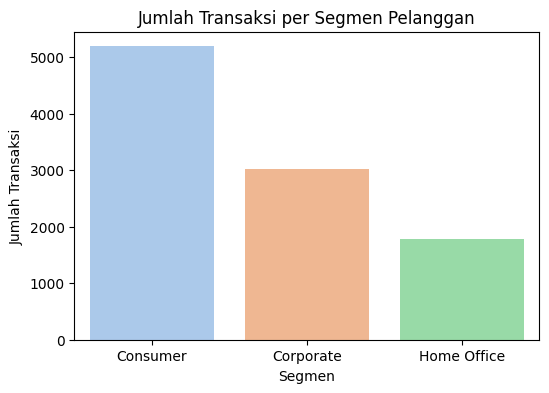

In [27]:
#Jumlah Transaksi per segmen
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')
plt.title('Jumlah Transaksi per Segmen Pelanggan')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Transaksi')
plt.show()

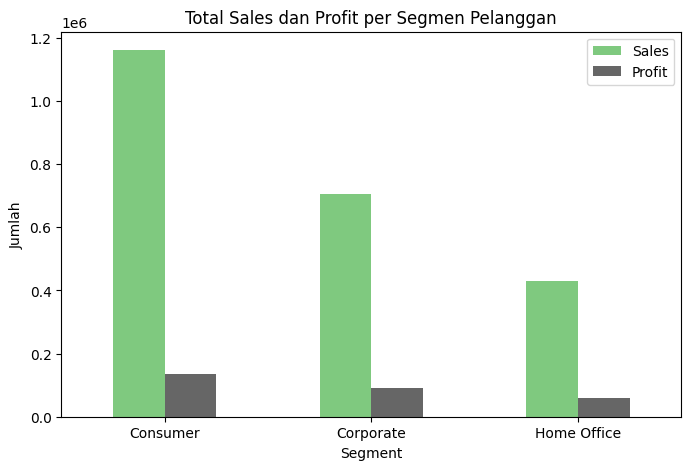

In [28]:
#total penjualan dan profit per segmen
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

segment_sales_profit.plot(kind='bar', figsize=(8,5), colormap='Accent')
plt.title('Total Sales dan Profit per Segmen Pelanggan')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# Rata-rata Diskon per Kategori

Mengetahui apakah diskon yang diberikan terlalu besar pada kategori tertentu, dan apakah itu berpengaruh pada profit.

Apakah kategori dengan diskon tinggi menghasilkan profit tinggi atau malah rugi?

Perlu evaluasi strategi diskon untuk kategori tertentu?

/tmp/ipython-input-29-1492862051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='coolwarm')


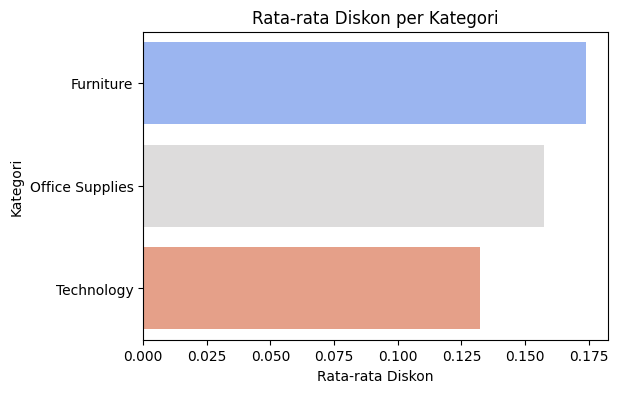

In [29]:
#Hitung Rata-rata Diskon per Kategori
avg_discount = df.groupby('Category')['Discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='coolwarm')
plt.title('Rata-rata Diskon per Kategori')
plt.xlabel('Rata-rata Diskon')
plt.ylabel('Kategori')
plt.show()

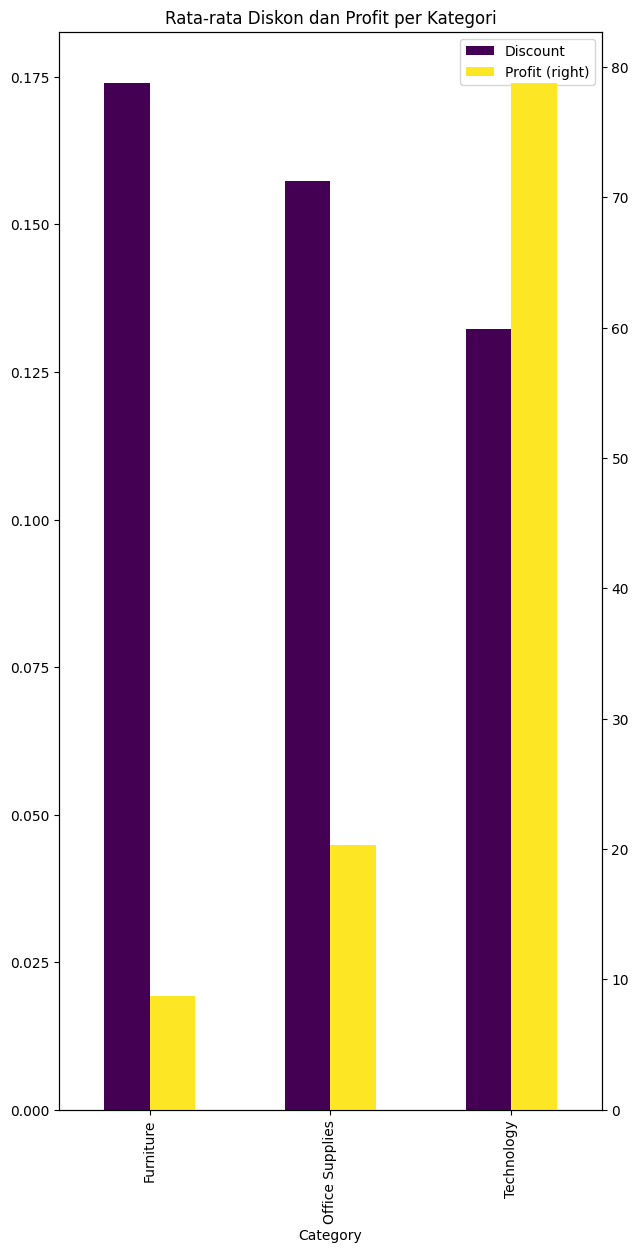

In [38]:
#Bandingkan dengan Profit
discount_profit = df.groupby('Category')[['Discount', 'Profit']].mean()

discount_profit.plot(kind='bar', figsize=(7,14), secondary_y='Profit', colormap='viridis')
plt.title('Rata-rata Diskon dan Profit per Kategori')
plt.xticks(rotation=0)
plt.show()